In [104]:
import os
import imageio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Ścieżka do folderu zawierającego zdjęcia
folder_path = '/media/marcin/5AD6135FD6133B29/Programowanie/Python/Magisterka/Praca Dyplomowa/Datasets/MESSIDOR'

x_list = []
y_list = []

# Ustawienie opcji wyświetlania pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Wczytanie ścieżek do wszystkich plików w folderze
file_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# Stworzenie ramki danych (DataFrame) z nazwami plików
df = pd.DataFrame({'file_path': file_paths})
df['image_name'] = df['file_path'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])


def showme(number):
    search_part_of_name = f'image{number}-'
    search_part_of_name2 = f'image{number}prime'
    result = df[df['image_name'].str.startswith(search_part_of_name) | df['image_name'].str.startswith(search_part_of_name2)]

    for idx in result.index:
        file_path = df['file_path'].iloc[idx]
        image = imageio.imread(file_path)
        plt.imshow(image)
        plt.axis('off')  # Ukrycie osi
        plt.title(df['image_name'].iloc[idx])
        plt.show()



In [106]:
for i in range (1,461):
    number = str(i)
    search_part_of_name = f'image{number}-'
    search_part_of_name2 = f'image{number}prime'
    result = df[df['image_name'].str.startswith(search_part_of_name) | df['image_name'].str.startswith(search_part_of_name2)]
    result_sorted = result.sort_values(by='image_name')

    # Wybieramy indeks ostatniego zdjęcia (X)
    last_index = result_sorted.index[-1]
    file_path_x = df['file_path'].iloc[last_index]
    image_x = imageio.imread(file_path_x)
    x_list.append(image_x)

    # Wybieramy indeks pierwszego zdjęcia (Y)
    first_index = result_sorted.index[0]
    file_path_y = df['file_path'].iloc[first_index]
    image_y = imageio.imread(file_path_y)
    y_list.append(image_y)


# Konwersja list na tablice NumPy
x_array = np.array(x_list)
y_array = np.array(y_list)

# Wyświetlenie kształtów tablic x_array i y_array
print('Shape of x_array:', x_array.shape)
print('Shape of y_array:', y_array.shape)




/tmp/ipykernel_33594/586806492.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_x = imageio.imread(file_path_x)
/tmp/ipykernel_33594/586806492.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_y = imageio.imread(file_path_y)


Shape of x_array: (920,)
Shape of y_array: (920,)


/tmp/ipykernel_33594/586806492.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_array = np.array(x_list)
/tmp/ipykernel_33594/586806492.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_array = np.array(y_list)


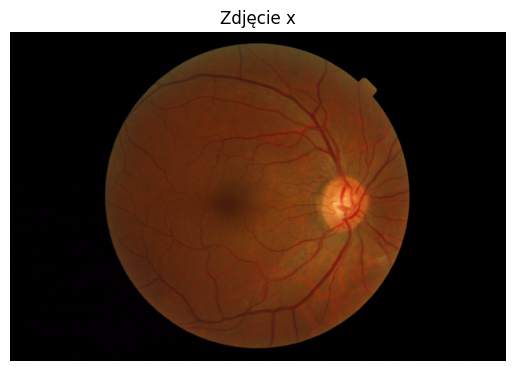

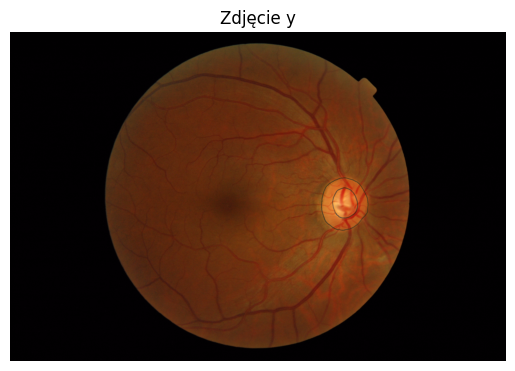

In [107]:
# Wybieramy jedno zdjęcie x i jedno zdjęcie y do wyświetlenia
index_x = 0  # Wybieramy pierwsze zdjęcie z tablicy x_array
index_y = 0  # Wybieramy pierwsze zdjęcie z tablicy y_array

# Wyświetlamy zdjęcie x
plt.imshow(x_array[index_x])
plt.axis('off')  # Ukrycie osi
plt.title('Zdjęcie x')
plt.show()

# Wyświetlamy zdjęcie y
plt.imshow(y_array[index_y])
plt.axis('off')  # Ukrycie osi
plt.title('Zdjęcie y')
plt.show()